In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

c:\Users\aless\OneDrive\Desktop\kcat_km_predictions


## Script to obtain the results of the fitted gradient boosting models

### Plot performance of different models

Pearson r

In [3]:
models = ["ESM1b", "rxnfp", "ESM1b_rxnfp", "ChemBERTa2",]
model_names = {"ESM1b": " ESM1b",
               "rxnfp": "rxnfp",
               "ESM1b_rxnfp": "ESM1b + rxnfp",
               "ChemBERTa2": "ChemBERTa2"}

*Xgboost is trained in HPC and results are copied inside the training_results directory*

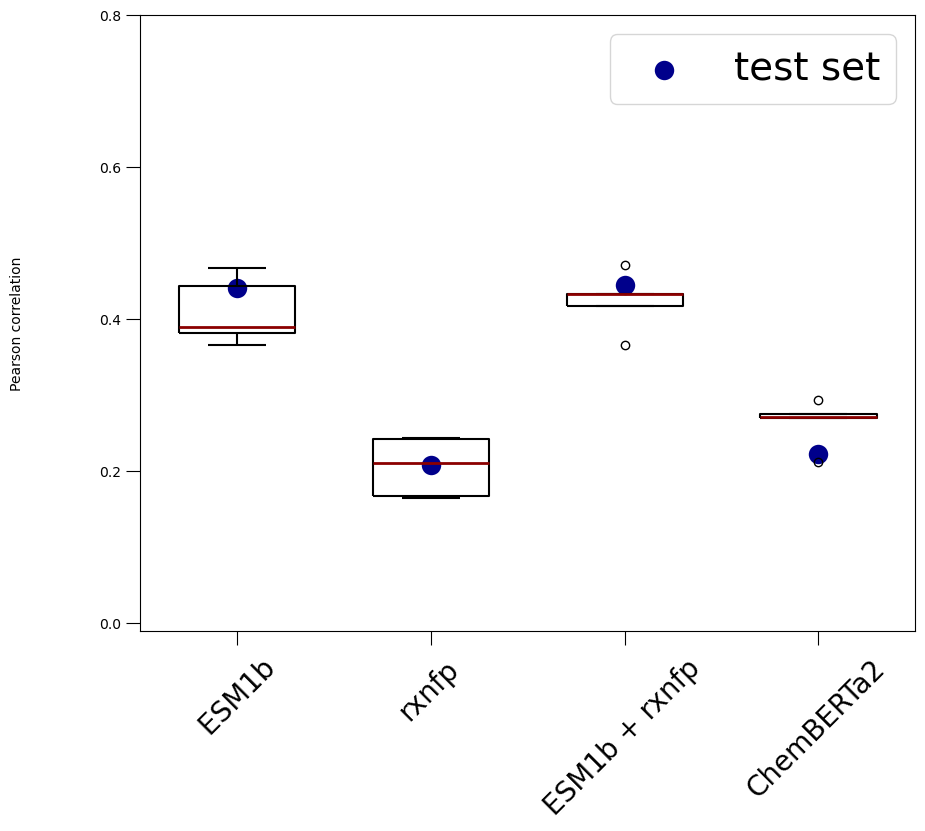

In [4]:
fig, ax = plt.subplots(figsize= (10,8))

plt.rcParams.update({"font.size": 28})
plt.ylim(-0.01, 0.8)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 20)
ax.tick_params(axis='x', which="minor",length=0, rotation = 45)


plt.ylabel("Pearson correlation")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.savefig(join("figures", "boxplots_pearson_r.png"))
plt.show()


Mean Squared Error

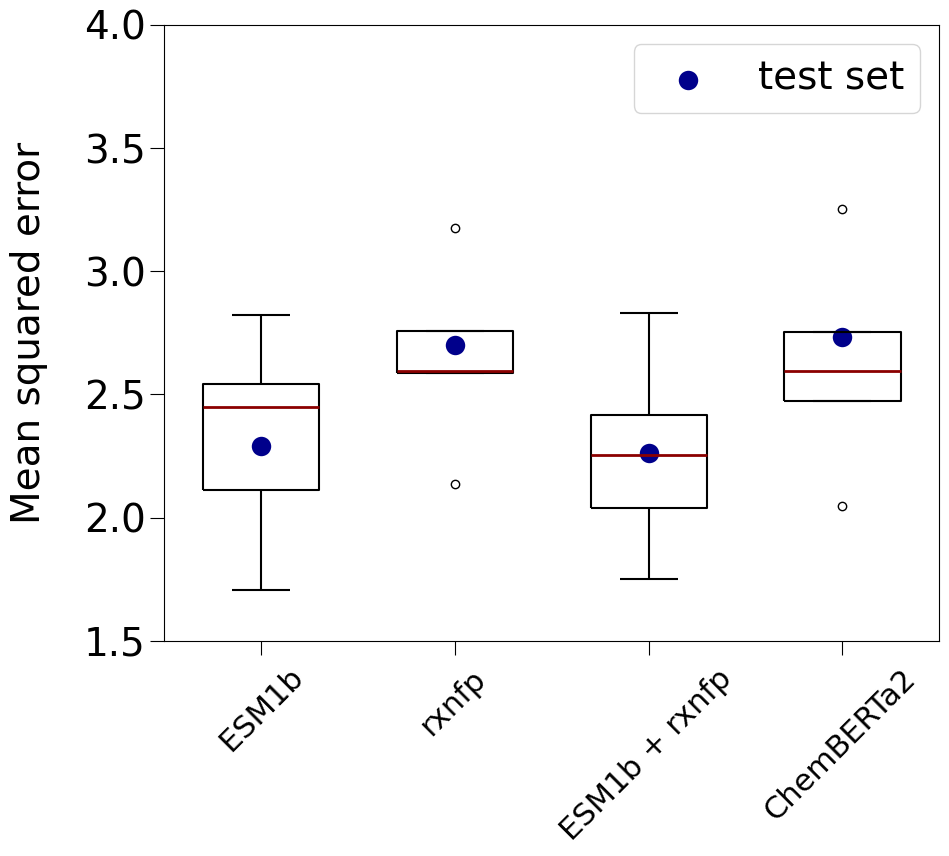

In [5]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})
plt.ylim(1.5, 4.0)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join( "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join( "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join( "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join( "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis="x", which="minor",length=0, rotation = 45)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.savefig(join("figures", "boxplots_mse.png"))
plt.show()

Coefficients of determination

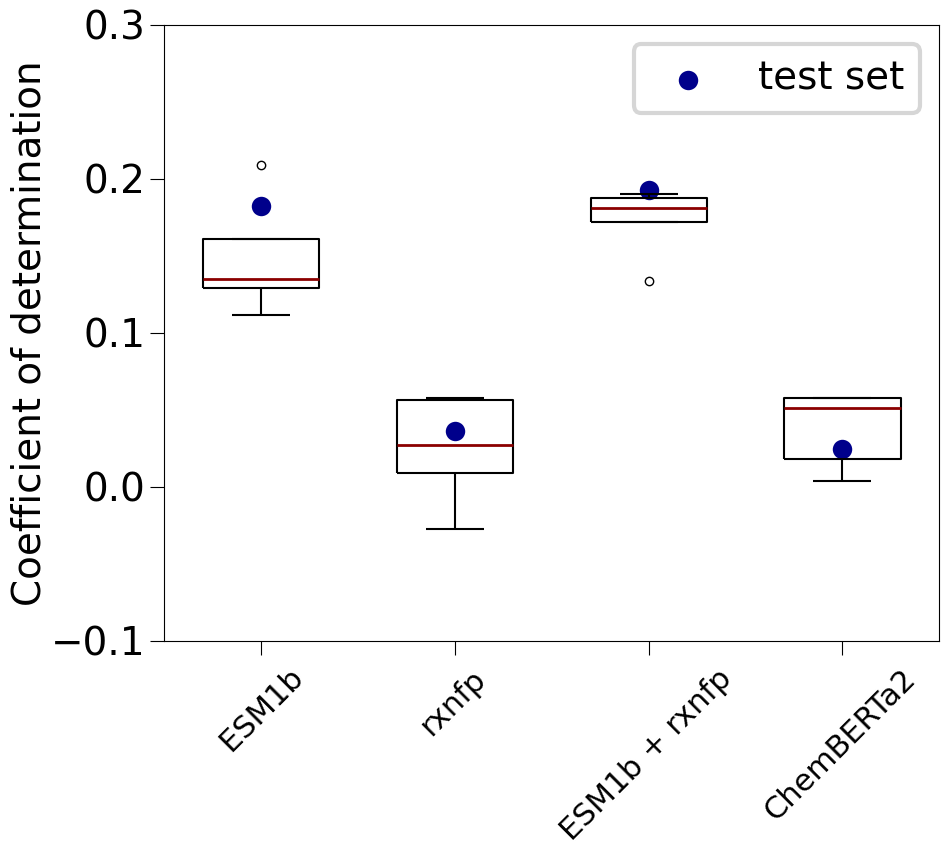

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({"font.size": 28})
plt.ylim(-0.1, 0.3)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8, label="test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8)

    Boxplots.append(R2_CV)
    ticks.append(i+1)

plt.boxplot(Boxplots, positions=ticks, widths=0.6,
           medianprops={"linewidth": 2, "solid_capstyle": "butt", "c": "darkred"},
           boxprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops={"linewidth": 1.5, "solid_capstyle": "butt"})

ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])  
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks) - 0.01)


ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y=-0.03, fontsize= 22)  
ax.tick_params(axis="x", which="minor", length=0, rotation= 45)
ax.locator_params(axis="y", nbins=5)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.15, 0.5)

leg = plt.legend(loc = "upper right")
leg.get_frame().set_linewidth(3.0)
plt.savefig(join("figures", "boxplots_R2.png"))
plt.show()



Statistical tests

In [7]:
models

['ESM1b', 'rxnfp', 'ESM1b_rxnfp', 'ChemBERTa2']

In [8]:
pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_ESM1b = abs(pred_y-test_y)

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_rxnfp = abs(pred_y-test_y)

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_ESM1b_rxnfp = abs(pred_y-test_y)

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[3] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[3] + ".npy"))
errors_ChemBERTa2 = abs(pred_y-test_y)



In [9]:
d = errors_ESM1b_rxnfp - errors_ESM1b
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with errors_ESM1b_rxnfp and ESM1b", p)

d = errors_ESM1b_rxnfp - errors_ChemBERTa2
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with errors_ESM1b_rxnfp and ChemBERTa2", p) 

d = errors_ESM1b_rxnfp - errors_rxnfp
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with errors_ESM1b_rxnfp and rxnfp", p)

Difference between predictions with errors_ESM1b_rxnfp and ESM1b 0.5989351734164566
Difference between predictions with errors_ESM1b_rxnfp and ChemBERTa2 1.8995029981250043e-06
Difference between predictions with errors_ESM1b_rxnfp and rxnfp 1.5383049654568425e-10


### Plotting predictions versus experimental values

Loading predictions for the best model (ESM1b_rxnfp)

In [10]:
model = "ESM1b_rxnfp"

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle(join("partitions", "test_df.pkl"))

data_test["n_values"] = data_test["kcat_km"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else [x])
n_values = np.array(data_test["n_values"])

In [11]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(1.0817817136527408, 12.072069127666666)

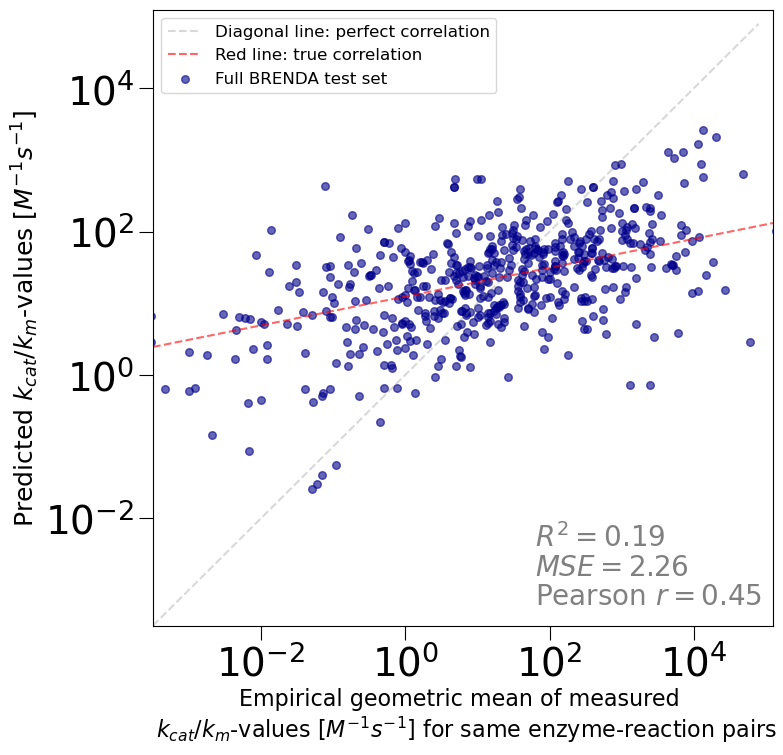

In [12]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({"font.size": 18})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.text(1.8, -2.4, r'$R^2= 0.19 $', fontsize=20, c = "grey") 
ax.text(1.8, -2.8, r'$MSE= 2.26 $', fontsize=20, c = "grey")
ax.text(1.8, -3.2, r'Pearson $r= 0.45 $', fontsize=20, c = "grey")

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])


reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed', label='Diagonal line: perfect correlation')
plt.plot([-3.5,5.1], [beta0 + -3.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed', label='Red line: true correlation')

plt.ylabel("Predicted $k_{cat}/k_{m}$-values [$M^{-1}s^{-1}$]", fontsize = 18)
plt.xlabel("Empirical geometric mean of measured \n $k_{cat}/k_{m}$-values [$M^{-1}s^{-1}$] \
for same enzyme-reaction pairs", fontsize = 16)

plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue", label="Full BRENDA test set")

plt.savefig(join("figures", "scatter_plot.png"))

leg = plt.legend(loc = "upper left", prop={'size': 12})
plt.show()

Histogram log10-transformed kcat/km values 

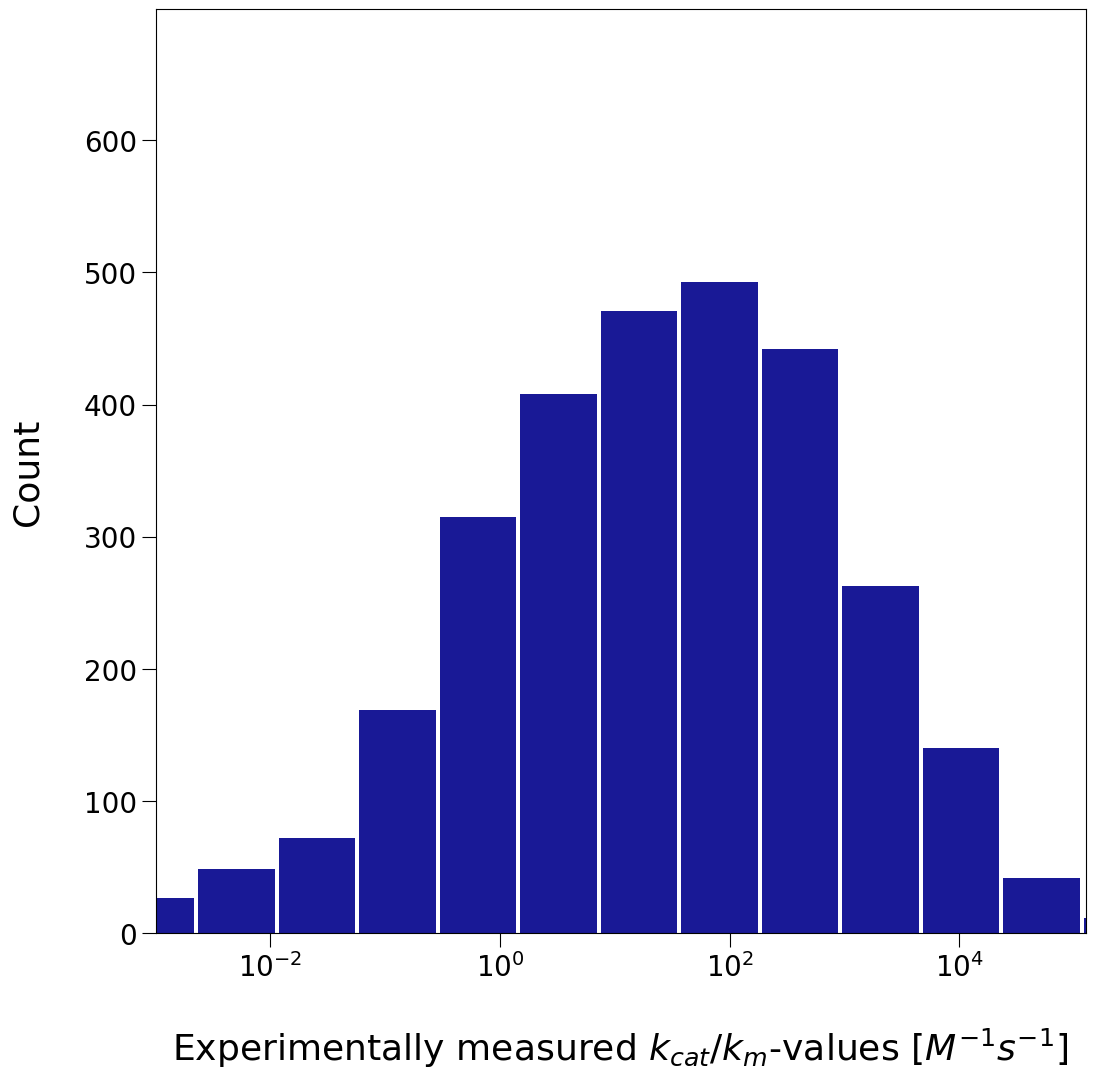

In [66]:
df_kcat_km = pd.read_pickle(join("files", "final_df_brenda.pkl"))
kcat_km_values = 10**np.array(df_kcat_km["kcat_km"])
log10_kcat_km_values = np.array(df_kcat_km["kcat_km"])

fig, ax = plt.subplots(figsize= (12,12))
plt.rcParams.update({"font.size": 20})


plt.ylim(ymax = 699, ymin = 0)
plt.xlim(xmax = 5.1, xmin = -3)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.yaxis.set_label_coords(-0.12, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

plt.ylabel("Count", fontsize = 26)
plt.xlabel("Experimentally measured $k_{cat}/k_{m}$-values [$M^{-1}s^{-1}$]", fontsize = 26)
plt.hist(log10_kcat_km_values, alpha = 0.9, color="darkblue",rwidth = 0.95, bins = 20)
plt.savefig(join("figures", "hist.png"))
plt.show()

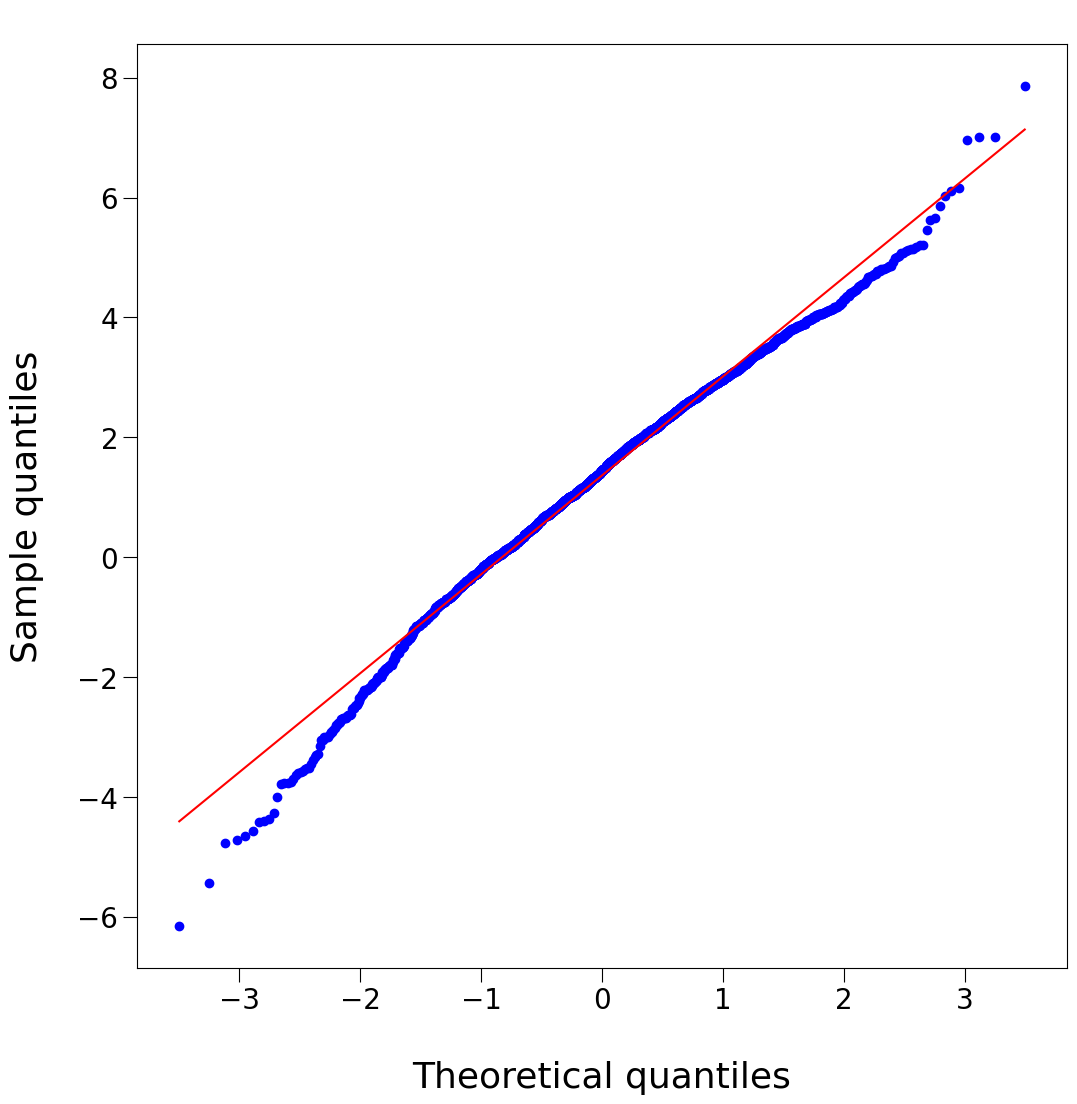

In [65]:
fig, ax = plt.subplots(figsize= (12,12))
plt.rcParams.update({"font.size": 20})


ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)


stats.probplot(log10_kcat_km_values, dist="norm", plot=ax)
ax.set_title(" ")
plt.ylabel("Sample quantiles", fontsize = 26)
plt.xlabel("Theoretical quantiles", fontsize = 26)
plt.savefig(join("figures", "qq_plot.png"))
plt.show()

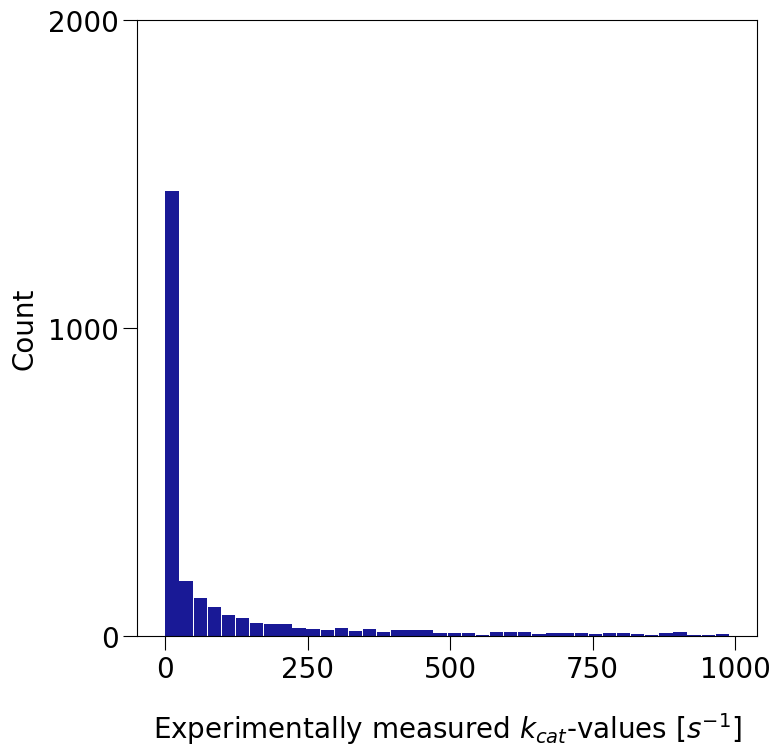

In [16]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({"font.size": 20})


plt.ylim(ymax = 2000, ymin = 0)
#plt.xlim(xmax = 5, xmin = -0.1)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.yaxis.set_label_coords(-0.16, 0.5)
ax.xaxis.set_label_coords(0.5, -0.12)

plt.yticks([0,1000,2000], ["0","1000","2000"])
plt.xticks([0,250,500, 750, 1000], ["0","250","500", "750", "1000"])

plt.ylabel("Count", fontsize = 20)
plt.xlabel("Experimentally measured $k_{cat}$-values [$s^{-1}$]", fontsize = 20)
plt.hist(kcat_km_values[kcat_km_values<1000], alpha = 0.9, color="darkblue", rwidth = 0.95, bins = 40)
plt.savefig(join("figures", "kcat_km.png"))
plt.show()

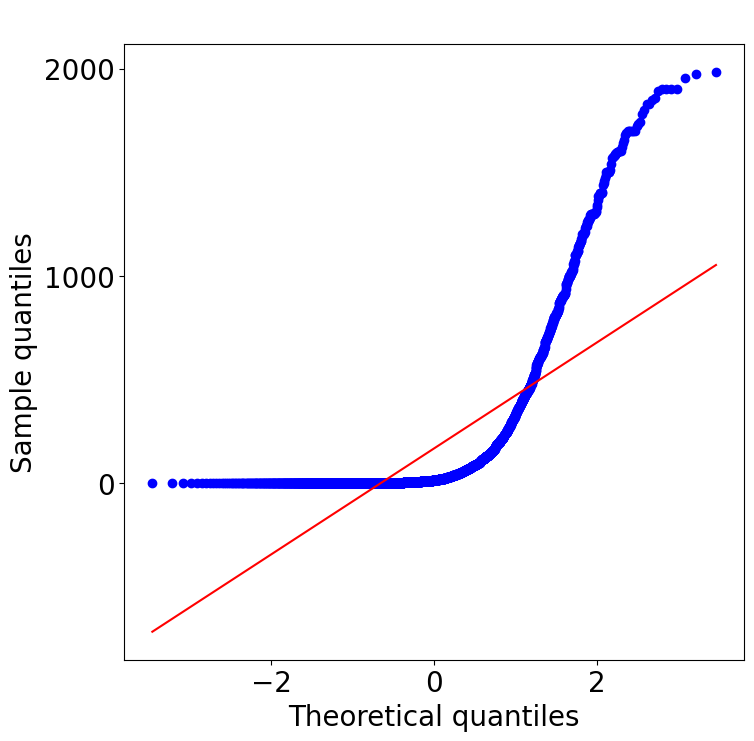

In [17]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({"font.size": 20})

#plt.ylim(ymax = 2500, ymin = -100)
#plt.xlim(xmax = 2500, xmin = -100)
#plt.xlim(xmax = 5, xmin = -0.1)

#ax.yaxis.set_label_coords(-0.08, 0.5)
#ax.xaxis.set_label_coords(0.5, -0.1)

stats.probplot(kcat_km_values[kcat_km_values<2000], dist="norm", plot=ax)
ax.set_title(" ")
plt.yticks([0,1000,2000], ["0","1000","2000"])
plt.ylabel("Sample quantiles", fontsize = 20)
plt.xlabel("Theoretical quantiles", fontsize = 20)
plt.savefig(join("figures", "kcat_km_qq_plot.png"))
plt.show()

Evaluating deviations in kcat/km measurements for the same enzyme-reaction pair

In [18]:
df = pd.read_pickle(join("files","kcat_km_gmean.pkl")) # done on the all dataframe
df

,EC,substrate,Organism,Uniprot,KEGG ID,kcat_km,kcat_km_count,kcat_km_gmean
0,2.8.4.2,arsenate,Corynebacterium glutamicum,P0DKS7,C11215,"[3.8, 3.4]",2,3.59444
1,2.7.7.2,ctp,Methanocaldococcus jannaschii,Q58579,C00063,[0.006],1,0.00600
2,2.7.7.2,atp,Methanocaldococcus jannaschii,Q58579,C00002,[0.16],1,0.16000
3,2.7.7.2,atp,Methanocaldococcus jannaschii,Q58579,D08646,[0.16],1,0.16000
4,2.7.7.2,atp,Methanocaldococcus jannaschii,Q58579,D02300,[0.16],1,0.16000
...,...,...,...,...,...,...,...,...
7661,2.7.1.91,atp,Homo sapiens,Q9NRA0,C00002,[6.3],1,6.30000
7662,2.7.1.91,atp,Homo sapiens,Q9NRA0,D08646,[6.3],1,6.30000
7663,2.7.1.91,atp,Homo sapiens,Q9NRA0,D02300,[6.3],1,6.30000
7664,3.7.1.13,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate",Janthinobacterium sp. J3,Q84II3,C01273,[730.0],1,730.00000


In [19]:
deviations = []
x_value = []
y_value = []

for ind in df.index:
    kcat_km = df["kcat_km"][ind]
    if len(kcat_km) > 1 :
        for i in range(len(kcat_km)):
            for j in range(i+1, len(kcat_km)):
                
                deviations.append(abs(np.log10(float(kcat_km[i])) - np.log10(float(kcat_km[j]))))
                x_value.append(np.log10(float(kcat_km[i])))
                y_value.append(np.log10(float(kcat_km[j])))

                
np.round(np.mean(deviations),2), np.round(10**np.mean(deviations),2)

(0.99, 9.84)

In [21]:
df = pd.read_pickle(join("files", "final_df_brenda.pkl"))
df.head()

,EC,substrate,Organism,Uniprot,KEGG ID,kcat_km_values,kcat_km_count,kcat_km,Sequence ID,Seq,ESM1b,KEGG reaction ID,KEGG IDs left,KEGG IDs right,substrate_SMILES,Reaction_SMILES,rxnfp,esm1b_rxnfp,ChemBERTa2
0,2.7.7.2,atp,Methanocaldococcus jannaschii,Q58579,C00002,[0.16],1,-0.795880,Sequence_1742,MKKRVVTAGTFDILHPGHYEILKFAKSLGDELIVIVARDETVKKLK...,"[-0.044629089534282684, 0.17446771264076233, -...",[R00161_f],"[C00002, C00061]","[C00013, C00016]",Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,"[0.9621078372001648, -0.09999620914459229, -0....","[-0.044629089534282684, 0.17446771264076233, -...","[0.10461673, 0.0, 0.4171699, 0.33389837, -0.22..."
1,2.7.7.2,fmn,Methanocaldococcus jannaschii,Q58579,C00061,[0.064],1,-1.193820,Sequence_1742,MKKRVVTAGTFDILHPGHYEILKFAKSLGDELIVIVARDETVKKLK...,"[-0.044629089534282684, 0.17446771264076233, -...",[R00161_f],"[C00002, C00061]","[C00013, C00016]",Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,"[0.9621078372001648, -0.09999620914459229, -0....","[-0.044629089534282684, 0.17446771264076233, -...","[0.10461673, 0.0, 0.4171699, 0.33389837, -0.22..."
2,2.7.7.2,fmn,Corynebacterium ammoniagenes,Q59263,C00061,[100.0],1,2.000000,Sequence_1748,MDIWYGTAAVPKDLDNSAVTIGVFDGVHRGHQKLINATVEKAREVG...,"[0.010040179826319218, 0.22952252626419067, -0...",[R00161_f],"[C00002, C00061]","[C00013, C00016]",Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,"[0.9621078372001648, -0.09999620914459229, -0....","[0.010040179826319218, 0.22952252626419067, -0...","[0.10461673, 0.0, 0.4171699, 0.33389837, -0.22..."
3,2.7.7.2,atp,Corynebacterium ammoniagenes,Q59263,C00002,[15.0],1,1.176091,Sequence_1748,MDIWYGTAAVPKDLDNSAVTIGVFDGVHRGHQKLINATVEKAREVG...,"[0.010040179826319218, 0.22952252626419067, -0...",[R00161_f],"[C00002, C00061]","[C00013, C00016]",Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,"[0.9621078372001648, -0.09999620914459229, -0....","[0.010040179826319218, 0.22952252626419067, -0...","[0.10461673, 0.0, 0.4171699, 0.33389837, -0.22..."
4,1.3.1.105,nadph,Fragaria vesca,O23939,C00005,[150.0],1,2.176091,Sequence_964,MAAAPSESIPSVNKAWVXSEYGKTSDVLKFDPSVAVPEIKEDQVLI...,"[0.01972285658121109, 0.385234534740448, -0.03...",[R10593_b],"[C20718, C00005, C00080]","[C20717, C00006]",C=C1OC(C)=C(O)C1=O.N=C(O)C1=CN([C@@H]2O[C@H](C...,C=C1OC(C)=C(O)C1=O.N=C(O)C1=CN([C@@H]2O[C@H](C...,"[0.6669322848320007, -0.3460233807563782, -0.3...","[0.01972285658121109, 0.385234534740448, -0.03...","[-0.32911405, 0.0, 0.7023653, 0.33816174, -0.5..."


In [22]:
deviations = []
x_value = []
y_value = []

for ind in df.index:
    kcat_km = df["kcat_km_values"][ind]
    if len(kcat_km) > 1 :
        for i in range(len(kcat_km)):
            for j in range(i+1, len(kcat_km)):
                
                deviations.append(abs(np.log10(float(kcat_km[i])) - np.log10(float(kcat_km[j]))))
                x_value.append(np.log10(float(kcat_km[i])))
                y_value.append(np.log10(float(kcat_km[j])))

                
np.round(np.mean(deviations),2), np.round(10**np.mean(deviations),2)

(0.89, 7.8)